# Considerações:
- Exemplo usando Pinecone para armazenamento de embeddings
- [Pinecone](https://www.pinecone.io/)

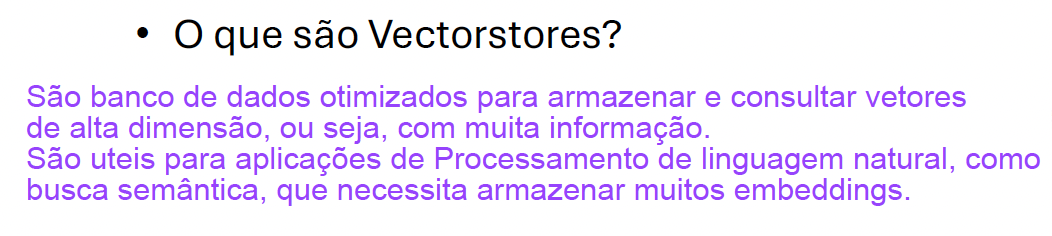

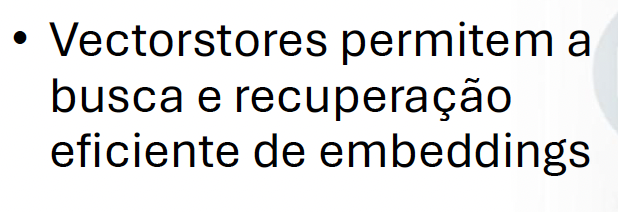

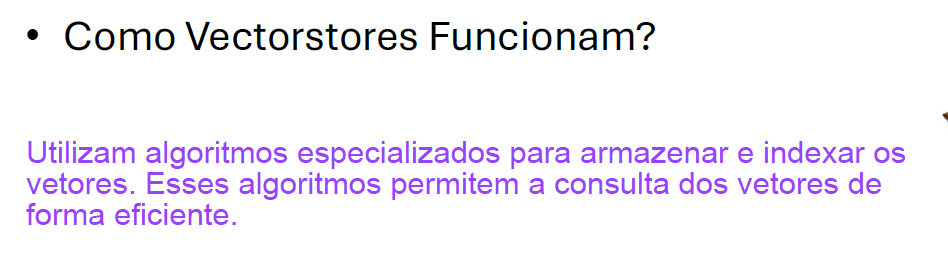

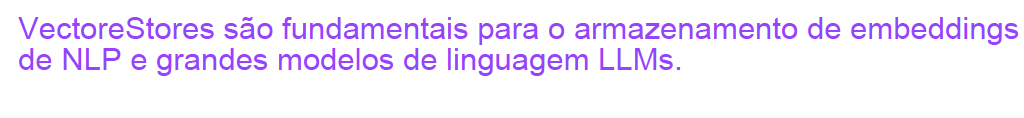

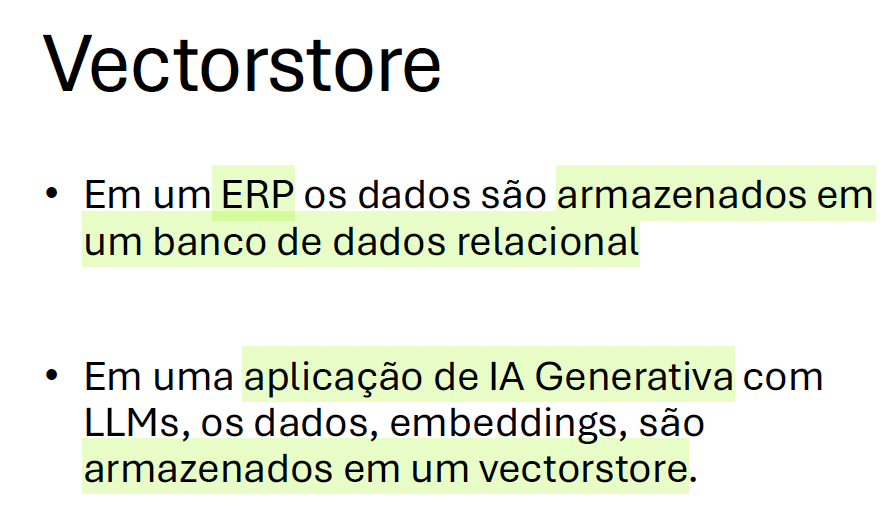

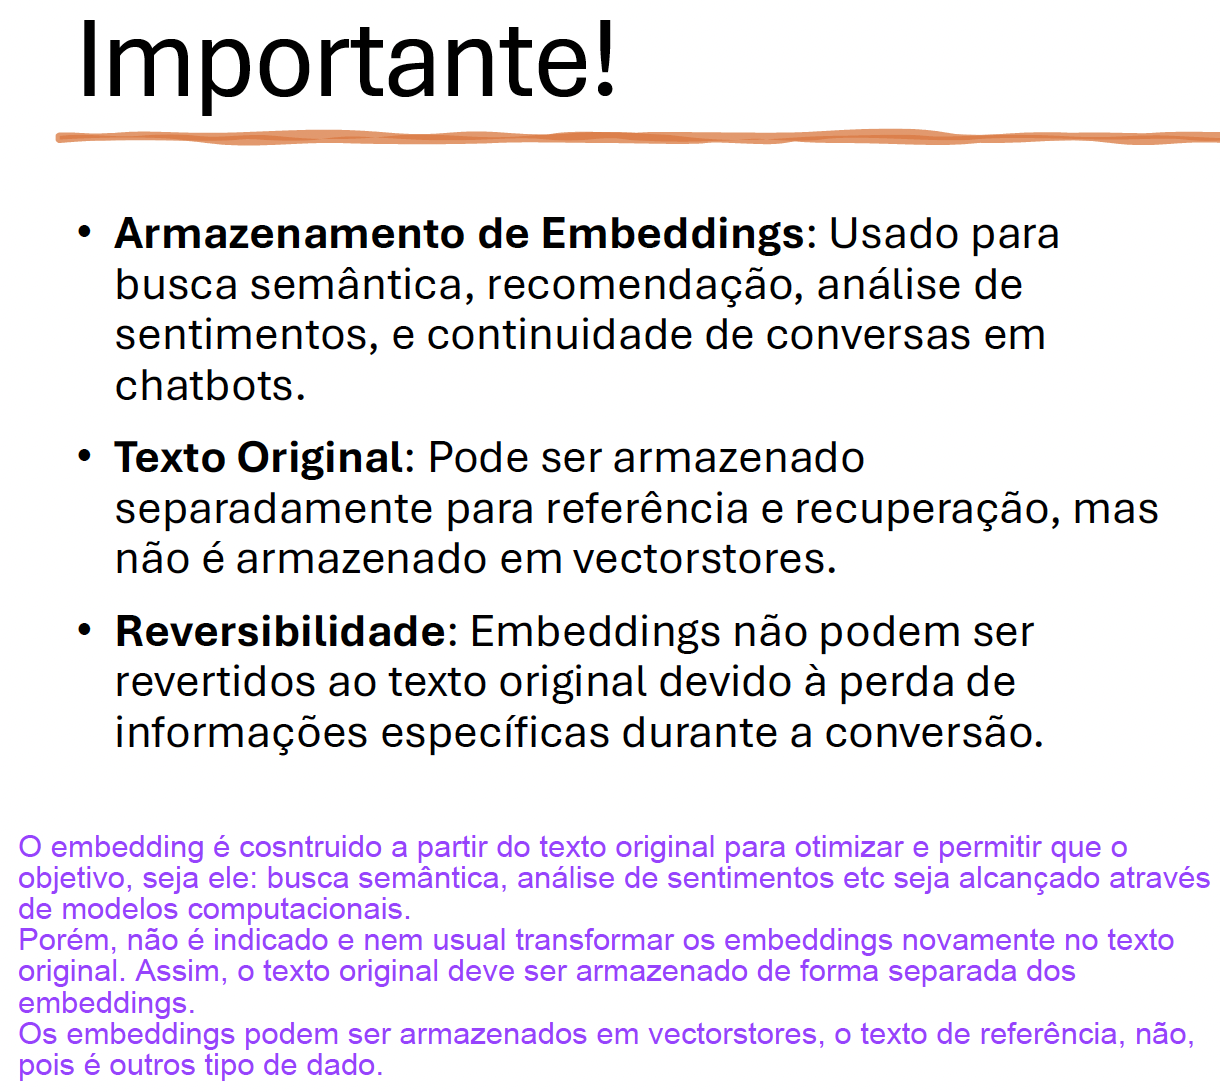

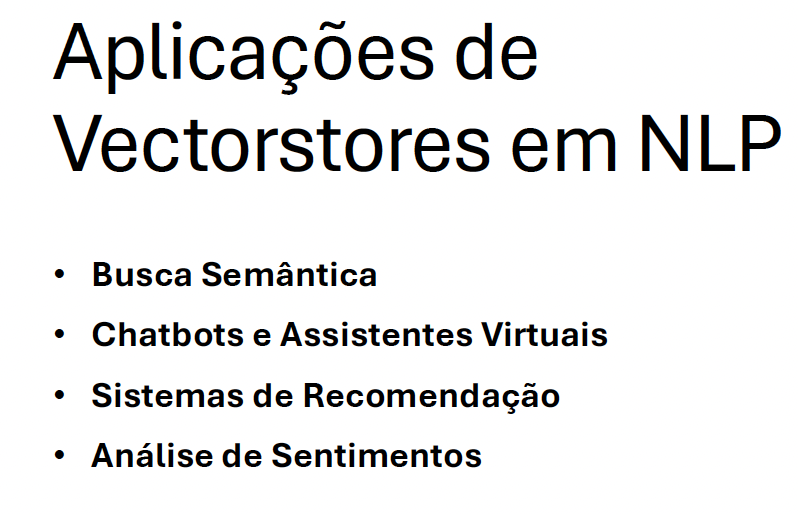

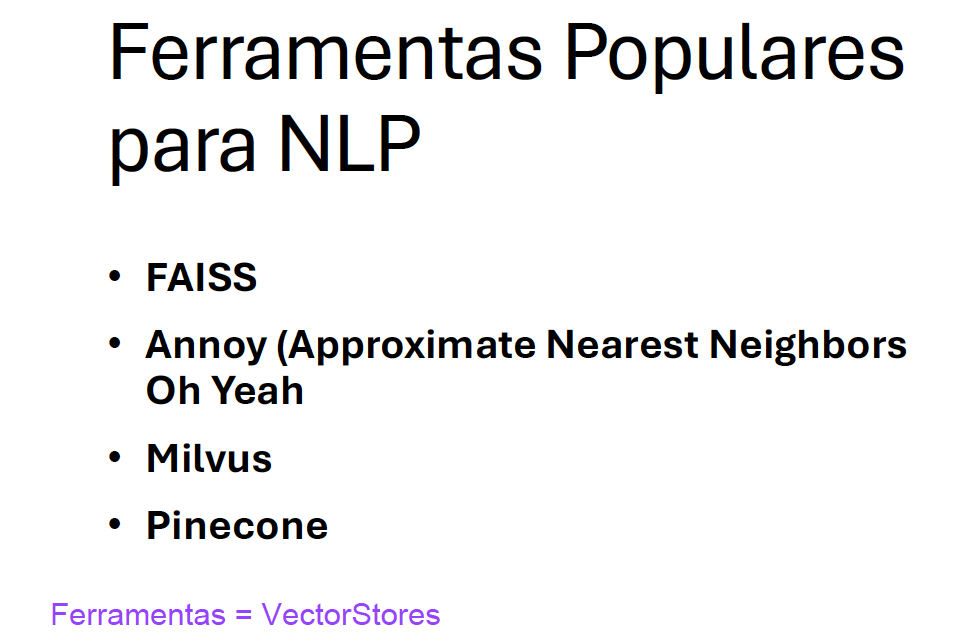

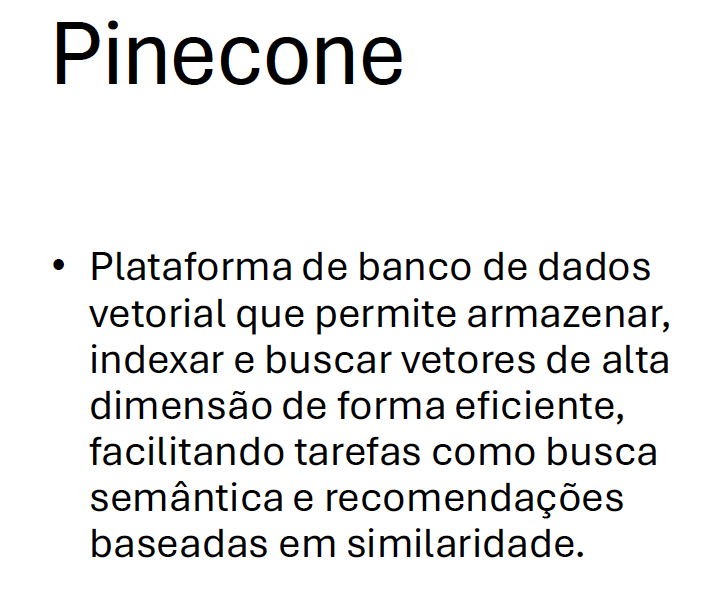

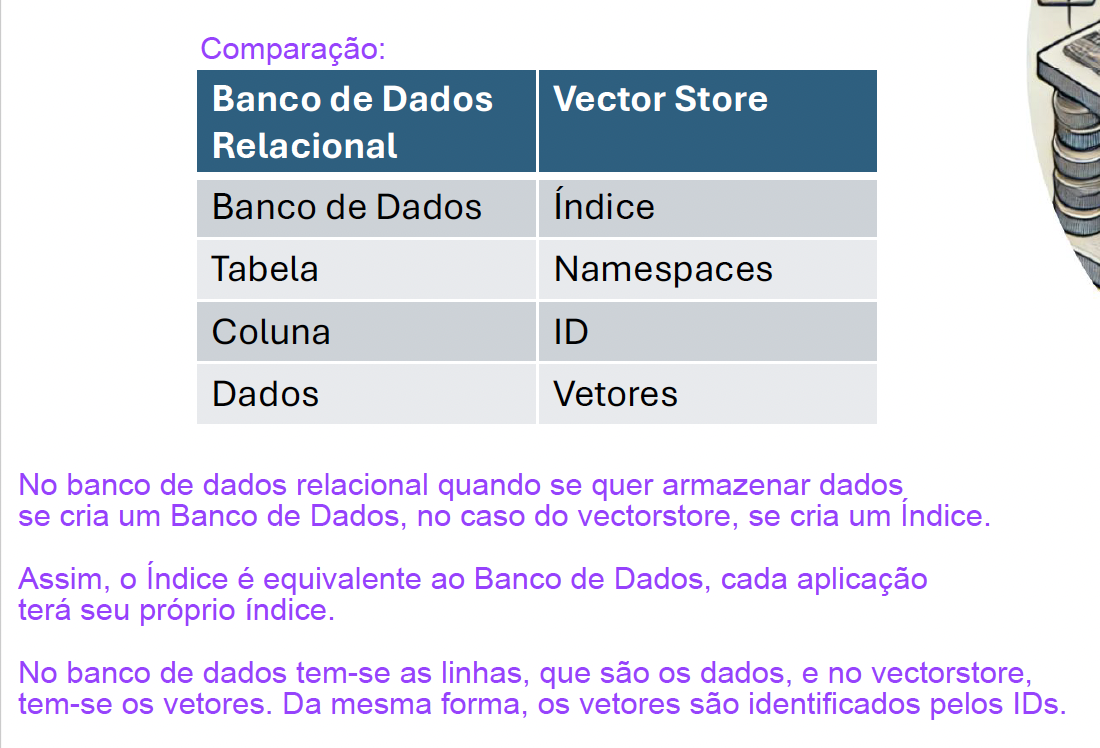

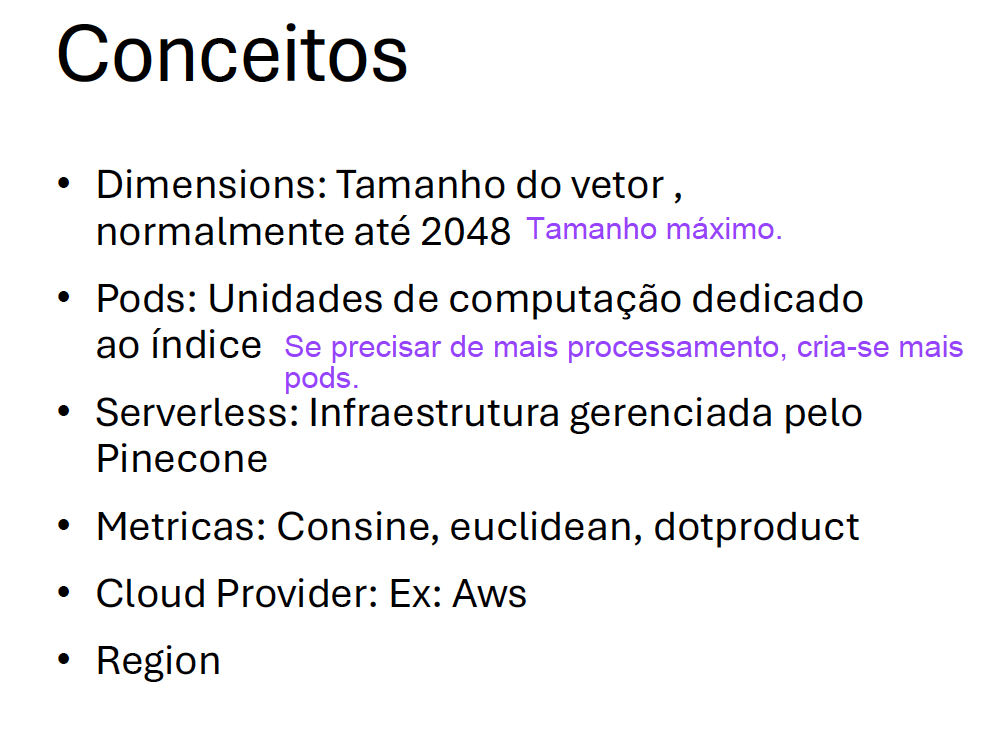

- Necessário se cadastrar, tem plano free, e obter a API KEY.

# Setup

In [13]:
# importando as bibliotecas

import numpy as np
from pinecone import Pinecone
import yaml
import os 

In [14]:
# lendo o arquivo config.yaml para ter acesso a chave de acesso do Pinecone

with open('config.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)
os.environ['PINECONE_API_KEY'] = config['PINECONE_API_KEY']

In [15]:
pinecone_client = Pinecone() # instanciando o objeto Pinecone()

## Pinecone

In [16]:
# metodo list_indexes retorna uma lista com todos os indices existentes/criados no pinecone

indices = pinecone_client.list_indexes()
print(indices)

{'indexes': [{'dimension': 2048,
              'host': 'indexpinecone-lwnbjk8.svc.aped-4627-b74a.pinecone.io',
              'metric': 'cosine',
              'name': 'indexpinecone',
              'spec': {'serverless': {'cloud': 'aws', 'region': 'us-east-1'}},
              'status': {'ready': True, 'state': 'Ready'}}]}


In [17]:
# Percorre a lista com o indices existentes no pinecone e imprinme informações sobre cada um deles - describe_index

for index in indices:
    index_name = index['name']
    print(f"Index: {index_name}")
    print(pinecone_client.describe_index(index_name))

# no caso, tem apenas um indice criado: indexpinecone

Index: indexpinecone
{'dimension': 2048,
 'host': 'indexpinecone-lwnbjk8.svc.aped-4627-b74a.pinecone.io',
 'metric': 'cosine',
 'name': 'indexpinecone',
 'spec': {'serverless': {'cloud': 'aws', 'region': 'us-east-1'}},
 'status': {'ready': True, 'state': 'Ready'}}


In [18]:
indice_nome = 'indexpinecone' # variável irá armazenar o nome do indice criado no Pinecone

In [19]:
# Insere 5 vetores aleatórios no indice: indexpinecone
# Índice é composto pelos vetores que contém os valores e cada vetor é identificado por um id/chave
# dentro de um mesmo indice pode-se ter vários vetores, por isso necessita de um identificador para os vetores.

# criando uma lista contendo por 5 listas (tolist()) com 2048 elementos cada uma e normalmente distribuidos (média 0 e desvio padrão 1)
vetores = [np.random.normal(0, 1, 2048).tolist() for _ in range(5)]
ids = ['a', 'b', 'c', 'd', 'e'] # identificadores dos vetores
indice = pinecone_client.Index(indice_nome) # instancia do indice_nome, para indicar sob qual indice será realizado as operações
                                            # quando referenciar esse objeto
indice.upsert(vectors=list(zip(ids, vetores))) # inserção dos vetores. Comando upsert: se o indice não existe ele inseri,
# se já existe, ele atualiza

{'upserted_count': 5}

In [20]:
# imprimindo o tamanho do vetor e um dos vetores
print("Quantidade de vetores: ", len(vetores))
print(vetores[4])

Quantidade de vetores:  5
[2.038780028203324, 0.14880165499177442, -0.40975335319234363, 0.08169479050558602, -0.020269653651510736, -1.0318514758760218, -0.29920922072539374, -1.7839640224877782, -0.07421209388383775, -0.6106416780963385, -1.9268017250848624, 1.7936621720169768, 0.5531598865924915, -0.10634953409618847, -1.4303405064712063, -1.1586038136271948, 0.9728889300166024, -0.12432714195183385, 0.5478378692963896, 0.819897850940734, 0.6400355637867161, 0.19207435762053196, 1.4149665119807522, -0.7404920129367445, 0.5428243162536718, -1.0454067831196387, -0.9599043165503964, 0.8990768016255457, 0.4199935859888044, -0.9804680501249721, -0.14987084130899045, 0.08053462674504774, -1.5056144617413048, 1.2009663556671595, -0.942129092685613, -0.29312804650742064, -0.17495550976518587, -1.5437326796683983, 0.6212901987367324, 0.5481660868220353, 0.4372915063491191, 1.170073667049967, 0.428278054812128, 0.6263875434782818, 0.24117658964769617, 2.609138542125263, -1.1447687141926386, -

In [21]:
print(indice.fetch(ids=['c'])) # imprimindo no indice a informação do vetor c
# são 2048 elementos em cada vetor conforme foi definido acima.
# primeiro elemento do vetor c: -0.12368948

{'namespace': '',
 'usage': {'read_units': 1},
 'vectors': {'c': {'id': 'c',
                   'values': [-0.12368948,
                              0.500849187,
                              0.0696282,
                              1.61367619,
                              -1.04707456,
                              0.00871367194,
                              0.11020194,
                              -0.25965637,
                              -0.478787601,
                              0.603195,
                              -0.942940295,
                              -1.93345129,
                              -0.355685532,
                              0.626450121,
                              -1.12935615,
                              -0.470390797,
                              1.12150776,
                              1.29024518,
                              0.844975293,
                              -0.726621151,
                              1.16130233,
                       

In [22]:
# Atualiza o valor dos vetores, somando 1 a cada posição do vetor

response = indice.fetch(ids=['c']) # fetch: seleciona o vetor, no caso o c

if 'vectors' in response and 'c' in response['vectors']: # verifica se é o vetor c que está salvo em response
    retorna_vetor = response['vectors']['c']['values'] # pega os 2048 valores do vetor c
    atualiza_vetor = [x + 1 for x in retorna_vetor]  # soma 1 a cada um dos elementos do vetor c
    indice.upsert(vectors=[('c', atualiza_vetor)]) # upsert para fazer a busca e atualização dos valores no vetor c
    print(indice.fetch(ids=['c'])) # fecth acessa e print imprimi os novos valores do vetor c
else:
    print("Vetor com ID 'c' não encontrado no índice.")

{'namespace': '',
 'usage': {'read_units': 1},
 'vectors': {'c': {'id': 'c',
                   'values': [0.876310527,
                              1.50084913,
                              1.06962824,
                              2.61367607,
                              -0.0470745601,
                              1.00871372,
                              1.11020195,
                              0.74034363,
                              0.521212399,
                              1.60319495,
                              0.0570597053,
                              -0.933451295,
                              0.644314468,
                              1.62645006,
                              -0.129356146,
                              0.529609203,
                              2.12150764,
                              2.29024529,
                              1.84497535,
                              0.273378849,
                              2.16130233,
                           

In [23]:
# Deletando os indices 
# objeto instanciado do indice + quais ids/indices
indice.delete(ids=['d', 'e'])

{}

In [24]:
print(indice.fetch(ids=['d', 'e'])) # confirmando a exclusão

{'namespace': '', 'usage': {'read_units': 1}, 'vectors': {}}


In [25]:
# describe_index_stats: traz algumas informações sobre os indices
print(indice.describe_index_stats()) 

{'dimension': 2048,
 'index_fullness': 0.0,
 'namespaces': {'': {'vector_count': 3}},
 'total_vector_count': 3}


In [26]:
# quando não se define um nome para o namespace, é indicado o default que é um valor vazio, conforme o print acima: 'namespaces': {'': {'vector_count': 3}},

# dos vetores já exixtentes nomeando o namespace
indice.upsert(vectors=list(zip(ids, vetores)), namespace='namespace1') # nomeando o namespace

# inserindo novos vetores: x, y, z (com 2048 elementos e normalmente distribuidos
# andom.normal(0, 1, 2048): média 0, desvio padrão 1. E incluindo e nomeando para o namespace2
indice.upsert(vectors=list(zip(['x', 'y', 'z'], 
                               [np.random.normal(0, 1, 2048).tolist() for _ in range(3)])), 
                                namespace='namespace2')

{'upserted_count': 3}

- é como se o vectorstore tivesse 3 bancos de dados o namespace default, o namespace1 e o namespace2

In [27]:
print(indice.fetch(ids=['a'], namespace='namespace1')) # imprimindo e confirmando a nomeação do namespace1

{'namespace': 'namespace1',
 'usage': {'read_units': 1},
 'vectors': {'a': {'id': 'a',
                   'values': [-0.736926675,
                              0.447319329,
                              -0.582522035,
                              -0.593523085,
                              0.955336034,
                              0.404063463,
                              1.49599588,
                              -0.296869129,
                              -1.49776697,
                              -1.20979655,
                              -0.131236434,
                              2.57301497,
                              -0.0854051709,
                              0.840176105,
                              0.412767142,
                              1.94170737,
                              0.0701730177,
                              -0.345357507,
                              -0.309039801,
                              -0.520471692,
                              -0.0495847054,


In [28]:
print(indice.fetch(ids=['x'], namespace='namespace2')) # imprimindo e confirmando o namespace2

{'namespace': 'namespace2',
 'usage': {'read_units': 1},
 'vectors': {'x': {'id': 'x',
                   'values': [-0.183214456,
                              -1.77271521,
                              1.26770568,
                              -0.787807822,
                              0.747303665,
                              1.33205307,
                              0.954863608,
                              -1.3541007,
                              -0.137840837,
                              0.975092649,
                              0.885585308,
                              -1.01436055,
                              0.224785849,
                              -1.03249502,
                              -1.00034595,
                              -0.0386229455,
                              -0.994225919,
                              -0.216865793,
                              2.14245,
                              -0.68540287,
                              0.474015355,
          

In [29]:
# Excluindo o vetor x do namespace2 
indice.delete(ids=['x'], namespace='namespace2')

{}

In [30]:
# confirmando a exclusão do vetor x do namespace2 
print(indice.fetch(ids=['x'], namespace='namespace2'))  # Deve retornar vazio

{'namespace': 'namespace2', 'usage': {'read_units': 1}, 'vectors': {}}


In [31]:
# Comparação de similaridade entre vetores
# essa é uma das principais funções dos vectorstores

query_vector = np.random.normal(0, 1, 2048).tolist() # criando um vetor de 2048 elementos e normalmente distribuido

# comparando o vetor armazenado em indice do namespace default: a, b, c, já que não foi definido
# top_k=3: para trazer os maiores similaridades | include_values=False: para não incluior valores
print(indice.query(vector=query_vector, top_k=3, include_values=False))

# comparando os scores os vetores são bem diferentes

{'matches': [{'id': 'b', 'score': 0.0134112621, 'values': []},
             {'id': 'a', 'score': -0.0141695384, 'values': []},
             {'id': 'c', 'score': -0.020814063, 'values': []}],
 'namespace': '',
 'usage': {'read_units': 5}}


- mais próximo de 1 mais similares
- mais próximo de 0 ou negativo mais diferentes